#  Example of analysis if WHALES output for Jason 2: warning the CCIv3 data for J2 was generated by TUM ... hence it has a slightly different format

In [21]:
import sys
PATH_with_functions = '/home/ardhuin/TOOLS/cci_whales/src'
sys.path.append(PATH_with_functions)

import numpy as np
import xarray as xr

# --- plotting and interactive stuff ----------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import fftconvolve

cNorm = mcolors.Normalize(vmin=0, vmax=2)
jet = plt.get_cmap('jet')
mpl.rcParams.update({'figure.figsize':[10,6],'axes.grid' : True,'font.size': 14,'savefig.facecolor':'white'})

from altimeters_parameters import alti_read_l2lr,alti_read_l2hrw

import matplotlib.pyplot as plt
import scipy.io
import os
import pathlib

import time


## 1. Reading a GDR file and making some basic plots to know where the data is 

Text(0.5, 0, 'latitude')

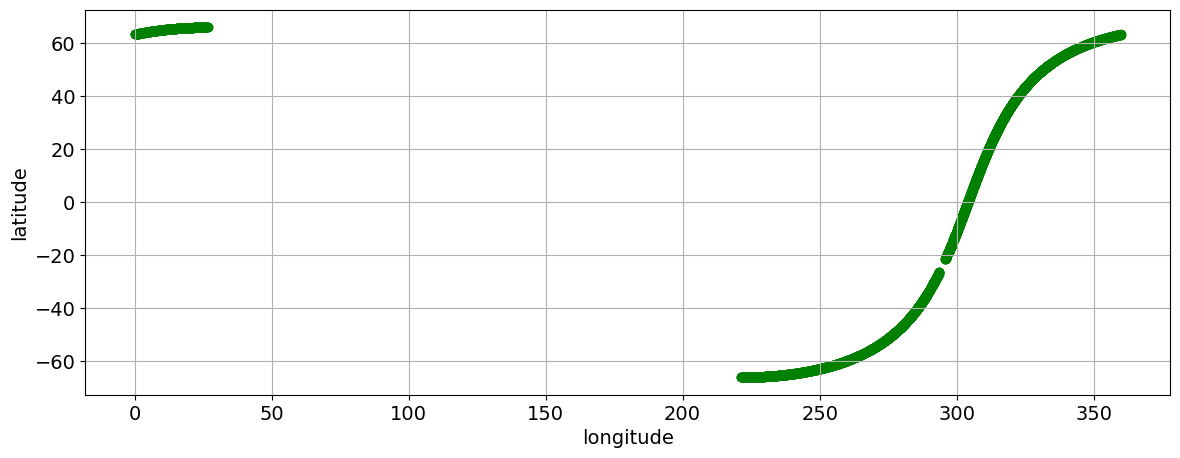

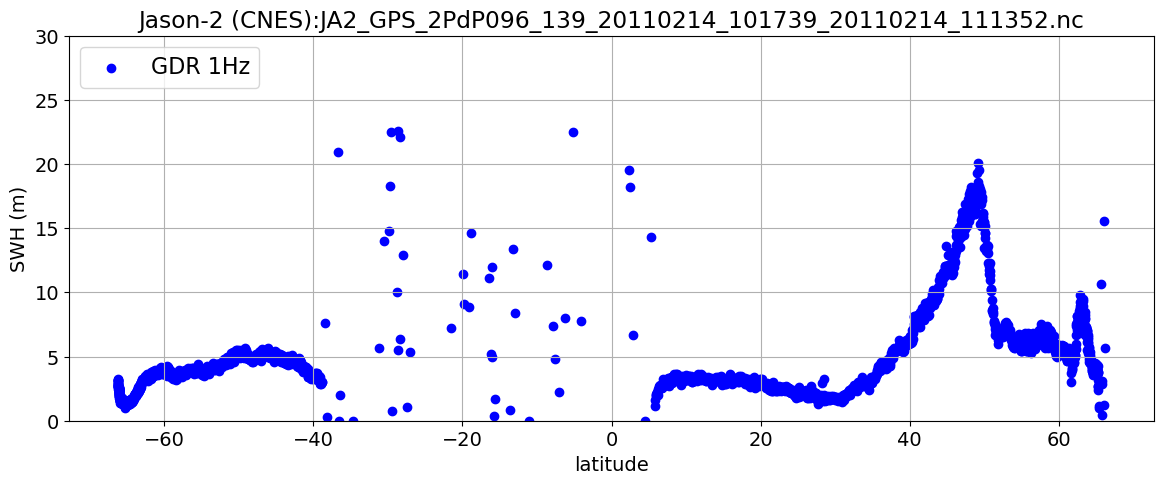

In [22]:

file='JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc' #  this contains storm Quirin (See Hanafin et al. BAMS 2012) 

#file='JA2_GPS_2PdP055_043_20091231_032131_20091231_041744.nc' # big error in CCI-v3/v4 : Baffin Bay 
#file='JA2_GPS_2PdP033_147_20090531_012016_20090531_021629.nc'  big error: iceberg? 
# First a few plots of the 1 Hz data to know where we are ... 

Sgd=alti_read_l2lr('jason2',file)

#S_landmask = np.ma.getdata(S.variables['surface_type'][:])


inds=np.where((np.isfinite(Sgd.swh_1hz)==1))[0]  # &  (S_landmask==0))[0]

fig,axs = plt.subplots(1,1,figsize=(14,5))
ax = axs
im=ax.scatter(Sgd.lon_1hz[inds],Sgd.lat_1hz[inds],c='g',label='GDR')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')


fig,axs = plt.subplots(1,1,figsize=(14,5))
ax = axs
im=ax.scatter(Sgd.lat_1hz[inds],Sgd.swh_1hz[inds],c='b',label='GDR 1Hz')
ax.legend(loc='upper left', fontsize=16)
ax.set_ylim([0,30])
#ax.set_xlim(lat_bounds) 
ax.set_ylabel('SWH (m)')
ax.set_title('Jason-2 (CNES):'+file)
ax.set_xlabel('latitude')


swh1 shape: (3082, 20)
lon1 shape: (3082, 20)
lat1 shape: (3082, 20)
flag1 shape: (3082, 20)


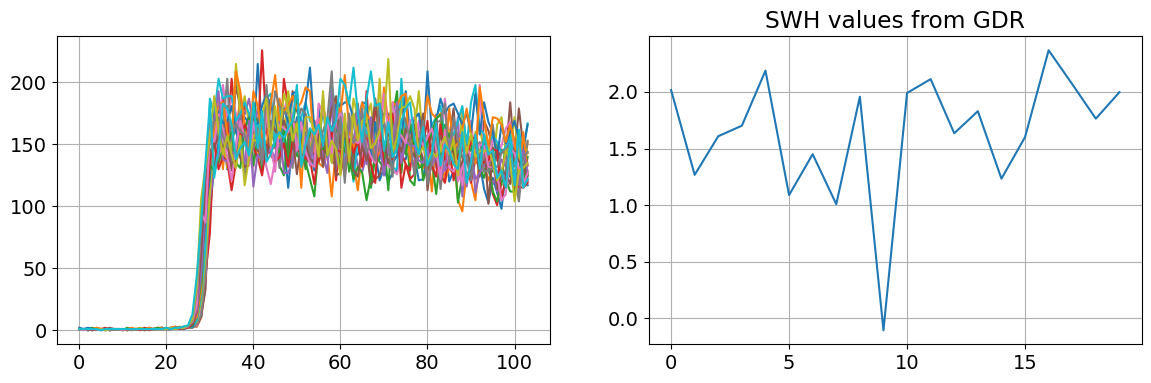

In [23]:
#Now we look at some waveforms ... 
Sg2d=alti_read_l2hrw('jason2',file)

fig,axs = plt.subplots(1,2,figsize=(14,4))
ax = axs[0]
ind=2000
im=ax.plot(Sg2d.waveforms[ind,:,:].T)
ax = axs[1]
im=ax.plot(Sg2d.swh2d[ind,:])
ax.set_title('SWH values from GDR')

ax.grid(True)

## 2. Now we look at our WHALES-retracked results

In [46]:
# 
file='JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc'
#file='SRL_GPS_2PfP001_0641_20130405_141055_20130405_150113.CNES.nc'
#ds_sgdr=xr.open_dataset(file)
#swh_sgdr0=ds_sgdr['data_01']['ku'].variables['swh_ocean']

# the files TEST* were obtained as follows (the -d 1 parameter is there to add the weights and normalized waveforms in the output): 
# conda activate seastatecci_whales
# WARNING: set variable in processing_choices: thrb=0.
# This test should reproduce the WHALES retracking used in CCI-v3 (this was produced by TUM and integrated by Ifremer in the CCI dataset) 
# time python python_WHALES_launcher.py -m jason2 -i JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc -d 1 -o TEST 
# This test should reproduce the WHALES retracking used in CCI-v4 
# time python python_WHALES_launcher.py -m jason2 -i JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc -d 1 -S 3 -o TESTS3 
# This test should reproduce the WHALES retracking that will be possibly used in CCI-v5 
# time python python_WHALES_launcher.py -m jason2 -i JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc -d 1 -w 2 -s 3 -o TESTw2s3 
fileg='/home/ardhuin/PUBLI/2025_SWOTgroups/'+file
file0='/home/ardhuin/PUBLI/2025_SWOTgroups/CCI/'+file
tag1='CCIv3'
file1='/home/ardhuin/PUBLI/2025_SWOTgroups/TEST/'+file
tag2='w2s3' # 
file2='/home/ardhuin/PUBLI/2025_SWOTgroups/TEST'+tag+'/'+file
Sg = xr.open_dataset(fileg)
S0 = xr.open_dataset(file0)
S1 = xr.open_dataset(file1)
print(file1)
S2 = xr.open_dataset(file2)
print(np.shape(S2.swh_WHALES_20hz))


/home/ardhuin/PUBLI/2025_SWOTgroups/TEST/JA2_GPS_2PdP096_139_20110214_101739_20110214_111352.nc
(3082, 20)


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


(61640,)
median std: 0.4924
median std: 0.3418, 0.3414,0.2988
median std: 0.5165
median std: 0.3678, 0.3670,0.3020
median std: 0.7291
median std: 0.5163, 0.5166,0.4820
S1: (3082, 20, 104) ## [-0.95651144 20.613186   20.757792   19.981276   21.121595   19.959167
 18.198338   18.068941   18.244164   -0.95056844 18.045074   19.11229
 16.76409    18.213194   20.101751   19.874924   20.693638   22.38106
 21.03714    19.925858  ]
S2: (3082, 20, 104) ## [20.129705 20.651207 18.853369 20.015322 20.21364  20.199171 18.575293
 18.265764 17.85876  18.383743 18.417461 19.169687 16.40996  18.233599
 19.056581 19.168903 20.093618 21.17685  20.376108 19.663069]


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


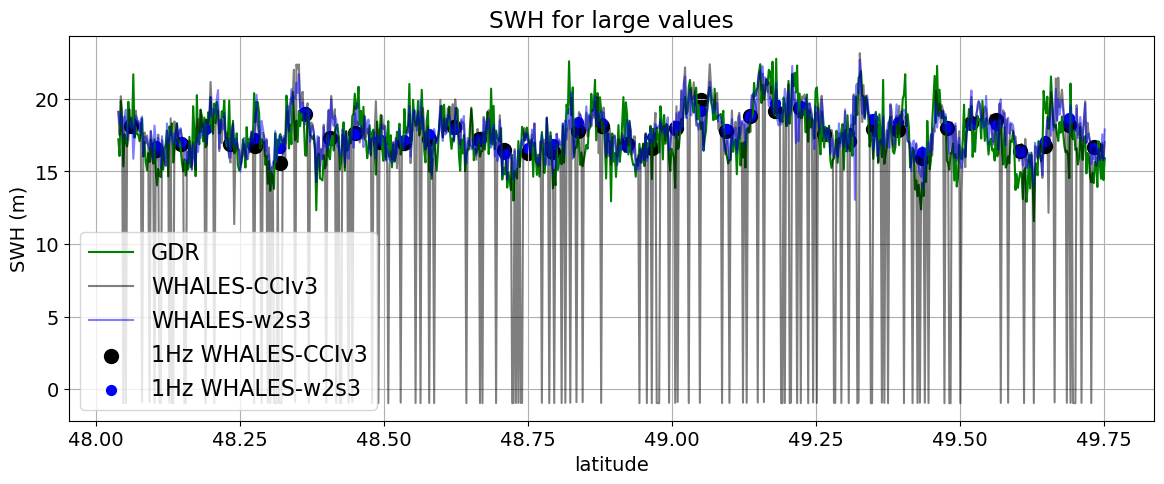

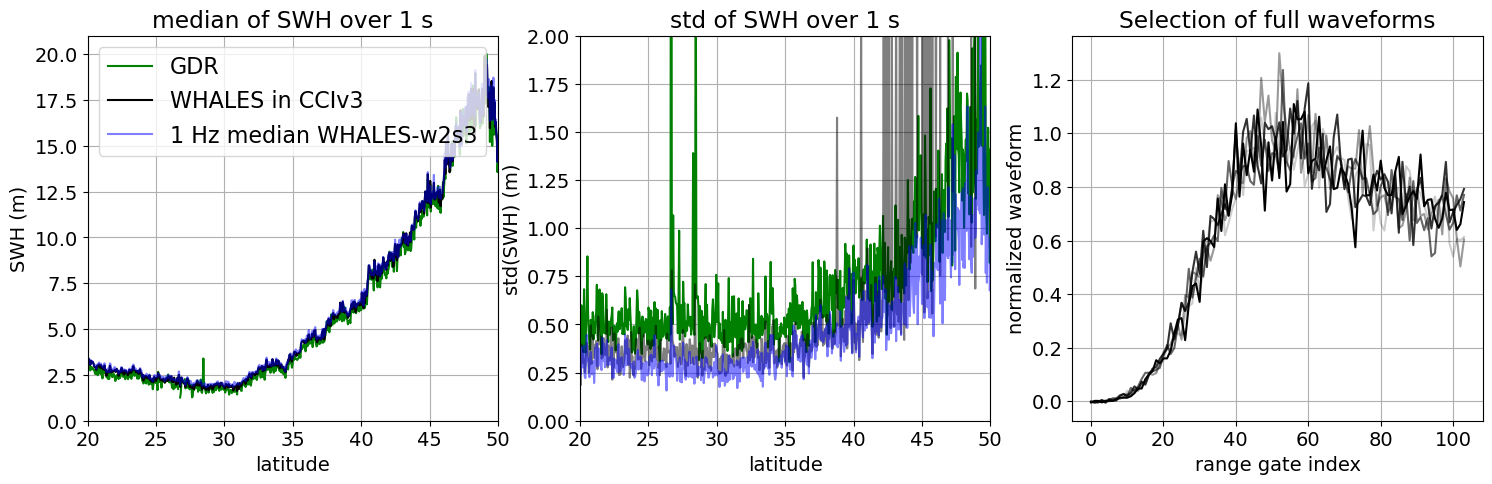

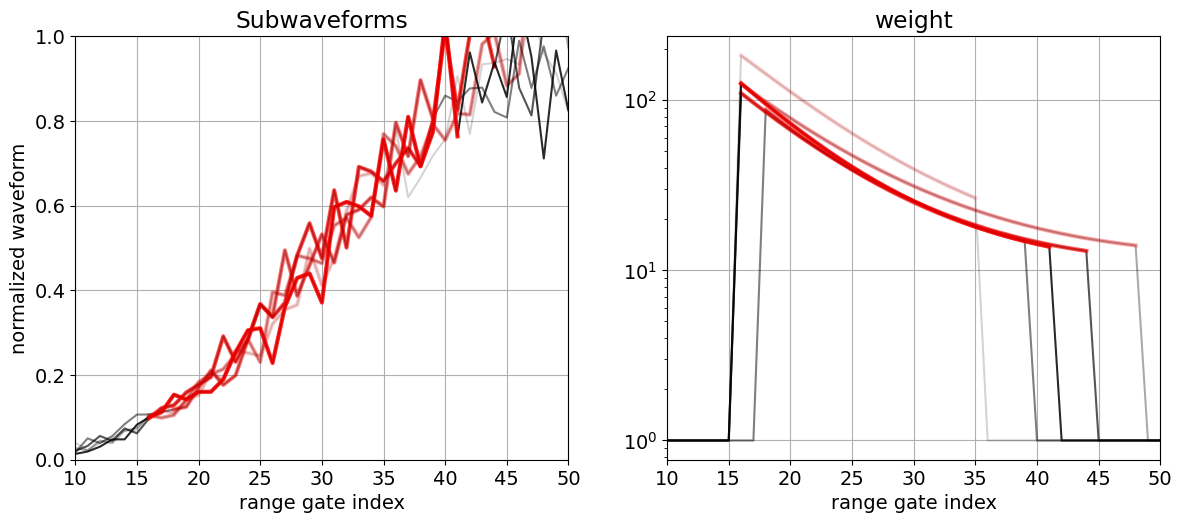

In [65]:
# First we look at very large values of SWH ...

Hs0=S0['swh.07'][:].values
lat0=S0['glat.00'][:].values

x=np.arange(0,104,1)

lati=S2.lat_20hz[:,:].values.flatten()
print(np.shape(lati))
Hsi=np.interp(lati,lat0,Hs0)
[nt,nr]=np.shape(S2.swh_WHALES_20hz)
Hsi2=Hsi.reshape((nt, nr))

latr=[20,50]
#latr=[20,40]

inds=np.where(S1.lat_20hz[:,0] >48)[0][0:40]

fig,axs = plt.subplots(1,1,figsize=(14,5))
ax = axs
latss=Sg.lat_20hz[inds,:].values.flatten()
im=ax.plot(latss,Sg.swh_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
im=ax.plot(latss,Hsi2[inds,:].flatten(),c='k',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(latss,S2.swh_WHALES_20hz[inds,:].values.flatten(),c='b',alpha=0.5,label='WHALES-'+tag2)
im=ax.scatter(S1.lat_20hz[inds,10],np.median(S1.swh_WHALES_20hz[inds,:],axis=1),c='k',s=100,label='1Hz WHALES-'+tag1)
im=ax.scatter(S2.lat_20hz[inds,10],np.median(S2.swh_WHALES_20hz[inds,:],axis=1),c='b',s=50,label='1Hz WHALES-'+tag2)
ax.set_title('SWH for large values')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('latitude')
ax.legend(loc='lower left', fontsize=16)

fig,axs = plt.subplots(1,3,figsize=(18,5))
ax = axs[0]
im=ax.plot(Sg.lat_20hz[:,0],np.median(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S1.lat_20hz[:,0],np.median(S1.swh_WHALES_20hz[:,:],axis=1),c='k',label='WHALES in CCIv3')
im=ax.plot(S2.lat_20hz[:,0],np.median(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='1 Hz median WHALES-'+tag)

inds=np.where(np.abs(S1.lat_20hz[:,0]-20) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )

inds=np.where(np.abs(S1.lat_20hz[:,0]-30) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )

inds=np.where(np.abs(S1.lat_20hz[:,0]-40) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )


#im=ax.plot(S1.startgate_WHALES)
ax.set_ylim((0,21))
ax.set_title('median of SWH over 1 s')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)


ax.legend(loc='upper left', fontsize=16)
ax = axs[1]
im=ax.plot(Sg.lat_20hz[:,0],np.nanstd(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S1.lat_20hz[:,0],np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),c='k',alpha=0.5,label='WHALES in CCIv3')
im=ax.plot(S2.lat_20hz[:,0],np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-w2')
ax.set_ylim((0,2))
ax.set_title('std of SWH over 1 s')
ax.set_ylabel('std(SWH) (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)
inds=np.where(S1.lat_20hz[:,0] >49)[0]
ind=inds[0]
ax = axs[2]
nt=5

for k in range(nt):
    im=ax.plot(x,S2.normalized_waveform[ind,k,:],c='k',alpha=(k+1)/nt)
axs[2].set_title('Selection of full waveforms')
axs[2].set_xlabel('range gate index')
axs[2].set_ylabel('normalized waveform')
fig.savefig('J2_Kirin_swh_waveforms.pdf')



#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))

fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
#im=ax.scatter(S1.lat_20hz[:,0],S1.swh_WHALES_20hz[:,0])
#im=ax.scatter(S1.lat_20hz[0:-1:20,0],S1.swh_WHALES_20hz[0:-1:20,:])

x=np.arange(0,104,1)
print('S1:',np.shape(S2.normalized_waveform),'##',S1.swh_WHALES_20hz[ind,:].values)
print('S2:',np.shape(S2.normalized_waveform),'##',S2.swh_WHALES_20hz[ind,:].values)

nt=5
for k in range(nt):
    i1=int(S2.startgate_WHALES[ind,k])
    i2=int(S2.endgate_WHALES[ind,k])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    im=ax.plot(x,S2.normalized_waveform[ind,k,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S2.normalized_waveform[ind,k,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S2.weights[ind,k,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S2.weights[ind,k,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms')
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight')
axs[1].set_xlabel('range gate index')
#axs[1].set_ylabel('weight')

axs[1].set_xlim(10,50)
axs[0].set_ylim(0.,1.0)
axs[0].set_xlim(10,50)
#im=ax.plot(S2.weights[ind,0,i1:i2],c='k')
#im=ax.plot(S2.weights[ind,0,i1:i2],c='g')
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_ylim((0,12))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag+'.pdf')



dims; 40 20 104
ind: 1968 0 26.665655 0.7960188388824463
ind: 1968 1 26.668089 0.8867483735084534
ind: 1968 2 26.670523 0.7348147630691528
ind: 1968 3 26.672956 0.6094760298728943
ind: 1968 4 26.67539 0.6328854560852051


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


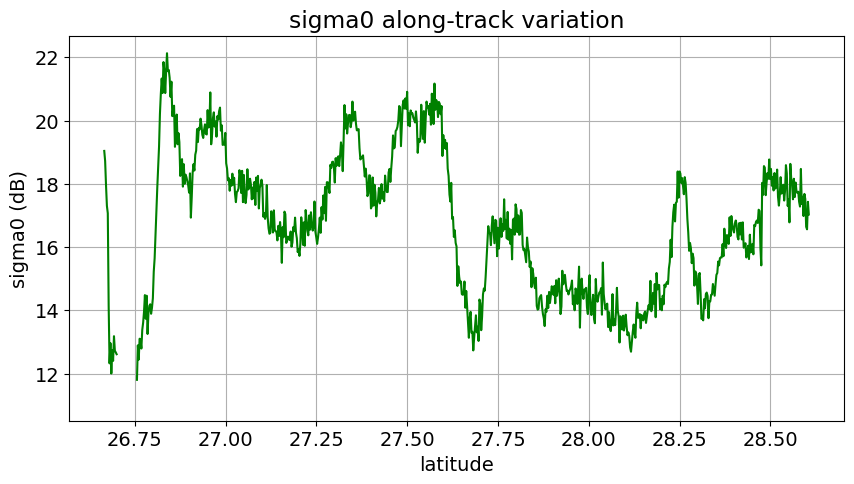

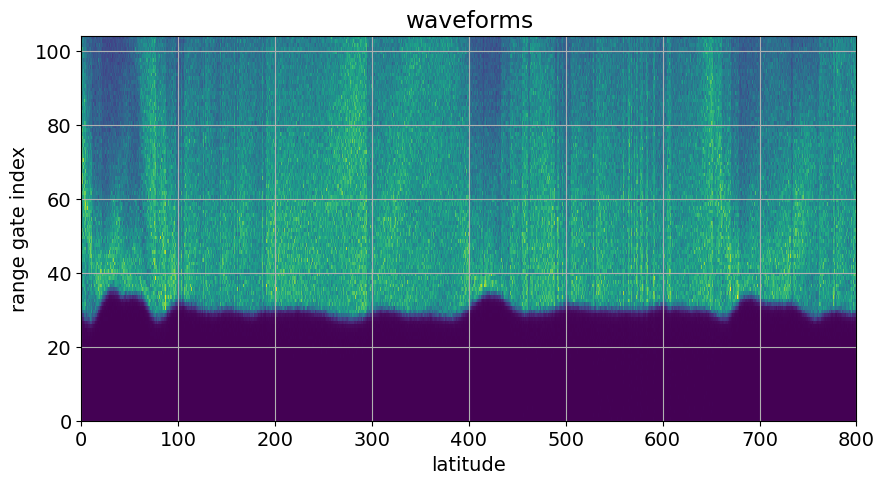

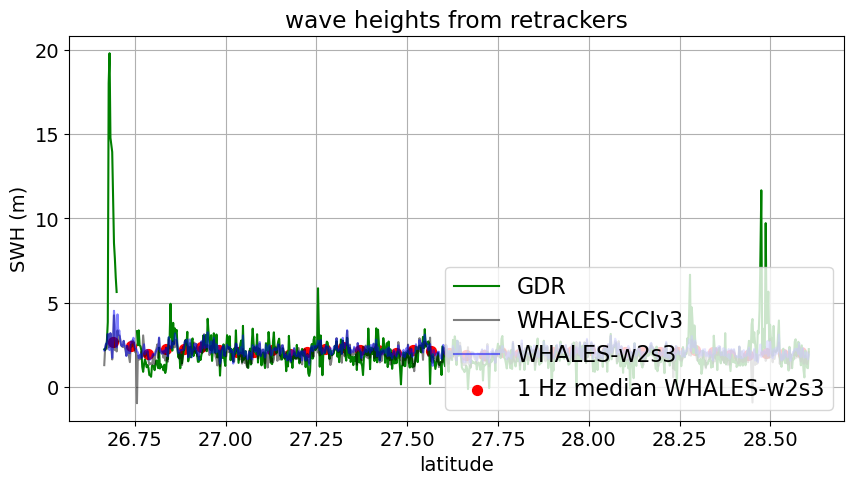

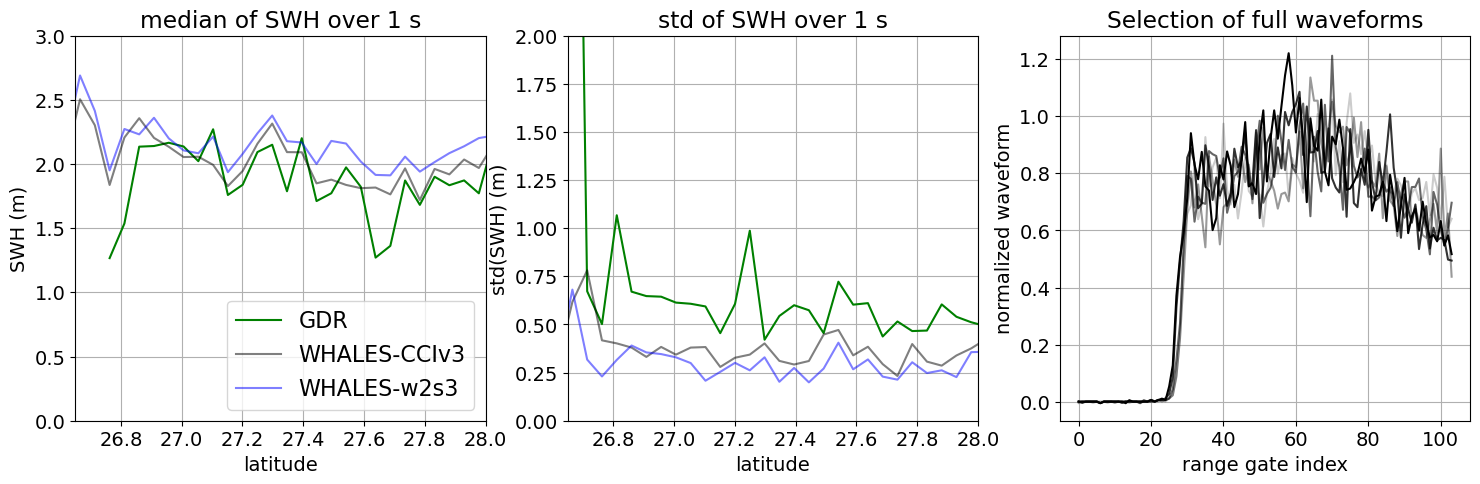

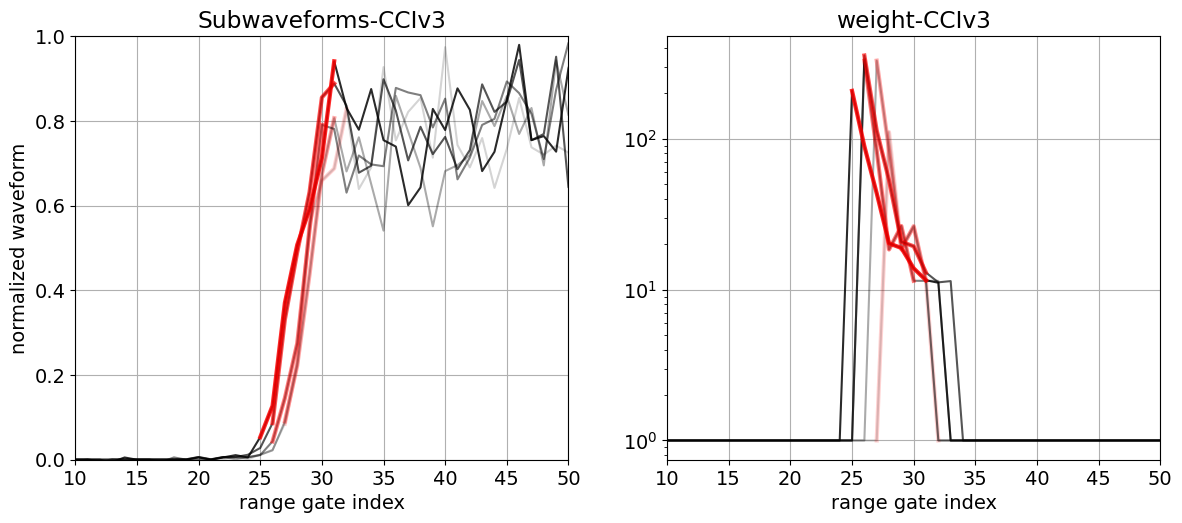

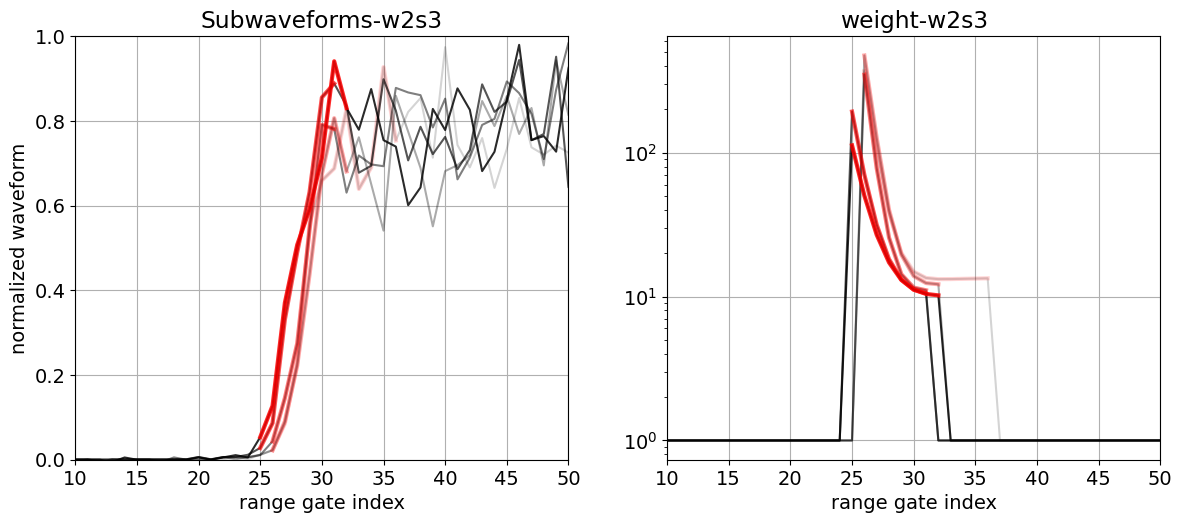

In [59]:
# Specific plots for sigma0-BLOOMS 

Hs0=S0['swh.07'][:].values
lat0=S0['glat.00'][:].values

lati=S2.lat_20hz[:,:].values.flatten()
Hsi=np.interp(lati,lat0,Hs0)
[nt,nr]=np.shape(S2.swh_WHALES_20hz)
Hsi2=Hsi.reshape((nt, nr))

lat1=26.65
latr=[lat1,28]
#latr=[20,40]
inds=np.where(S1.lat_20hz[:,0] >lat1)[0][0:40]
latss=Sg.lat_20hz[inds,:].values.flatten()

##############   plot of sigma0 along-track 
fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(latss,Sg.sig0_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
ax.set_title('sigma0 along-track variation')
ax.set_ylabel('sigma0 (dB)')
ax.set_xlabel('latitude')


##############   plot of waveforms
fig,axs = plt.subplots(1,1,figsize=(10,5))
[n1,n2,n3]=Sg.waveforms_20hz_ku[inds,:].shape
print('dims;',n1,n2,n3)
waveforms=Sg.waveforms_20hz_ku[inds,:].values.reshape((n1*n2,n3))
ax = axs
im=ax.pcolormesh(waveforms.T)
ax.set_title('waveforms')
ax.set_ylabel('range gate index')
ax.set_xlabel('latitude')

##############   impact of sigma0 on SWH 
fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(latss,Sg.swh_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
im=ax.plot(latss,S1.swh_WHALES_20hz[inds,:].values.flatten(),c='k',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(latss,S2.swh_WHALES_20hz[inds,:].values.flatten(),c='b',alpha=0.5,label='WHALES-'+tag2)
im=ax.scatter(S2.lat_20hz[inds,10],np.median(S2.swh_WHALES_20hz[inds,:],axis=1),c='r',s=50,label='1 Hz median WHALES-'+tag2)
ax.set_title('wave heights from retrackers')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('latitude')
ax.legend(loc='lower right', fontsize=16)


#############"  Plots medians and stds ... 
fig,axs = plt.subplots(1,3,figsize=(18,5))
ax = axs[0]
im=ax.plot(Sg.lat_20hz[:,0],np.median(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S1.lat_20hz[:,0],np.median(S1.swh_WHALES_20hz[:,:],axis=1),c='k',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(S2.lat_20hz[:,0],np.median(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-'+tag2)

ax.set_ylim((0,3))
ax.set_title('median of SWH over 1 s')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)
ax.legend(loc='lower right', fontsize=16)


x=np.arange(0,104,1)
ax = axs[1]
im=ax.plot(Sg.lat_20hz[:,0],np.nanstd(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
im=ax.plot(S1.lat_20hz[:,0],np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),c='k',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(S2.lat_20hz[:,0],np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-'+tag2)
ax.set_ylim((0,2))
ax.set_title('std of SWH over 1 s')
ax.set_ylabel('std(SWH) (m)')
ax.set_xlabel('latitude')
ax.set_xlim(latr)
inds=np.where(S1.lat_20hz[:,0] >lat1)[0]
ind=inds[0]
ax = axs[2]
n1=0
nt=5
for k in range(nt):
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/nt)
    print('ind:',ind,k+n1,S1.lat_20hz[ind,k+n1].values,np.max(S2.normalized_waveform[ind,k+n1,98:-1]).values)
    
axs[2].set_title('Selection of full waveforms')
axs[2].set_xlabel('range gate index')
axs[2].set_ylabel('normalized waveform')
fig.savefig('J2_Kirin_waveforms_TEST'+tag+'_low.pdf')


# Subwaveforms and weights for 1st option
fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
x=np.arange(0,104,1)
for k in range(nt):
    i1=int(S1.startgate_WHALES[ind,k+n1])
    i2=int(S1.endgate_WHALES[ind,k+n1])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    im=ax.plot(x,S1.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S1.normalized_waveform[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S1.weights[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S1.weights[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms-'+tag1)
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight-'+tag1)
axs[1].set_xlabel('range gate index')


axs[1].set_xlim(10,50)
axs[0].set_ylim(0,1)
axs[0].set_xlim(10,50)
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag1+'_low.pdf')

# Subwaveforms and weights for second option
fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
x=np.arange(0,104,1)
for k in range(nt):
    i1=int(S2.startgate_WHALES[ind,k+n1])
    i2=int(S2.endgate_WHALES[ind,k+n1])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S2.normalized_waveform[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S2.weights[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S2.weights[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms-'+tag2)
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight-'+tag2)
axs[1].set_xlabel('range gate index')


axs[1].set_xlim(10,50)
axs[0].set_ylim(0,1)
axs[0].set_xlim(10,50)
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag2+'_low.pdf')



median std: 0.7291
median std: 0.5163, 0.5166,0.4820
S1: (3082, 20, 104) ## [3.0733147 3.0940733 2.694531  3.2820792 2.791737  2.877895  2.5503592
 2.386444  2.8773298 3.194994  2.6954663 2.8456469 2.9734495 2.0631747
 1.9174622 1.8076187 2.2427652 1.7797287 1.891725  0.8173934]
S2: (3082, 20, 104) ## [3.0127149  3.1012795  2.8898234  3.232909   2.7973528  2.8944738
 2.6121972  2.6267185  2.8176653  3.2321904  2.690237   2.76709
 2.9314291  1.9408691  2.0446346  1.8921322  1.4393117  1.806866
 1.4119613  0.64410025]
ind: 14 15 -66.133705 0.23599529266357422
ind: 14 16 -66.13362 0.1728701889514923
ind: 14 17 -66.133545 0.1309986412525177
ind: 14 18 -66.13346 0.22874079644680023
ind: 14 19 -66.13338 0.4645853340625763


/home/ardhuin/miniconda3/envs/OPTOOLS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


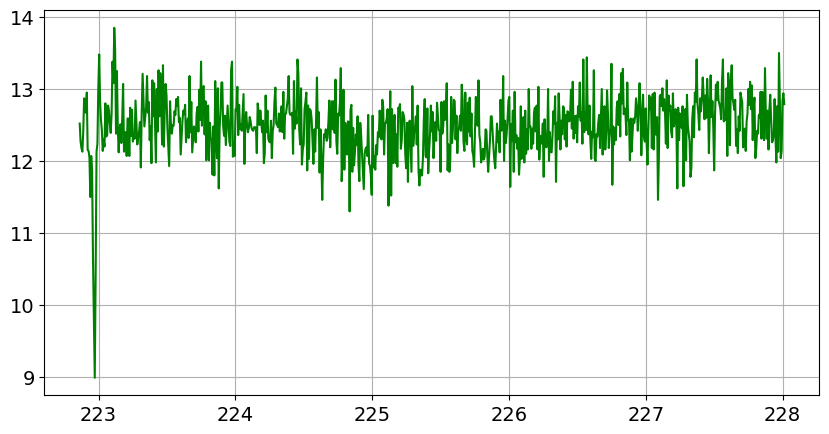

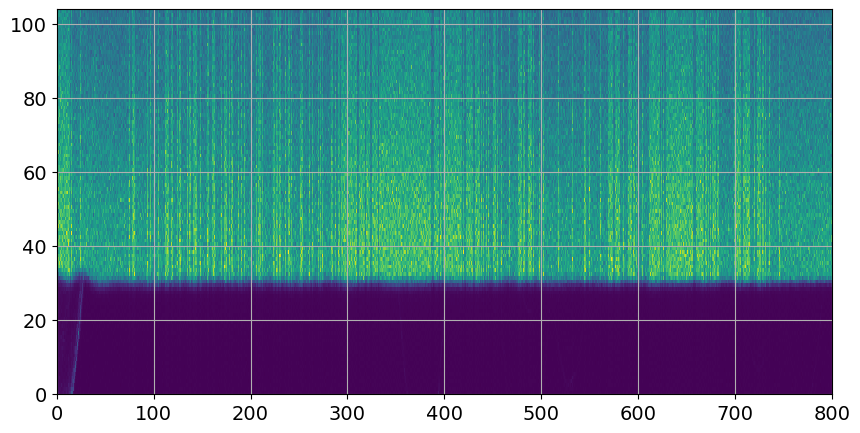

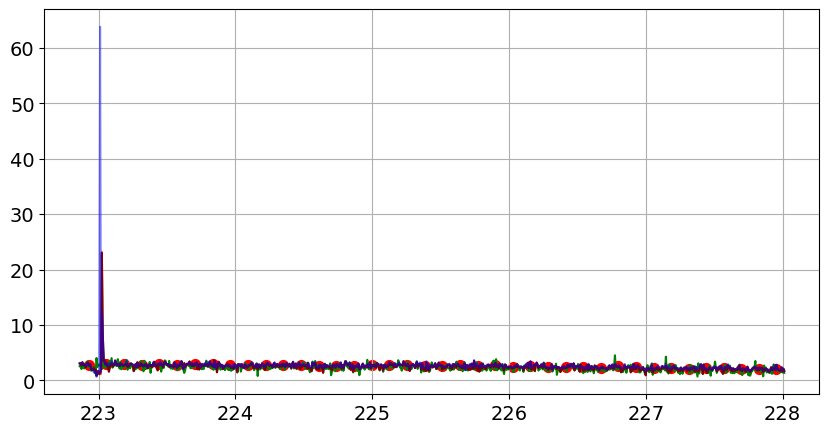

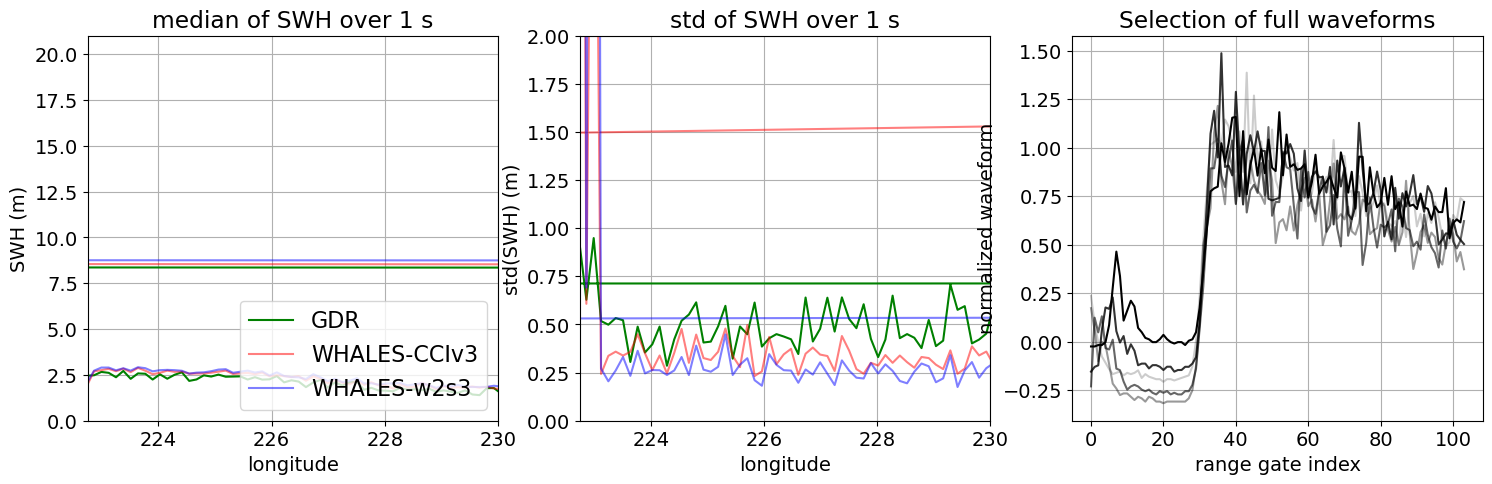

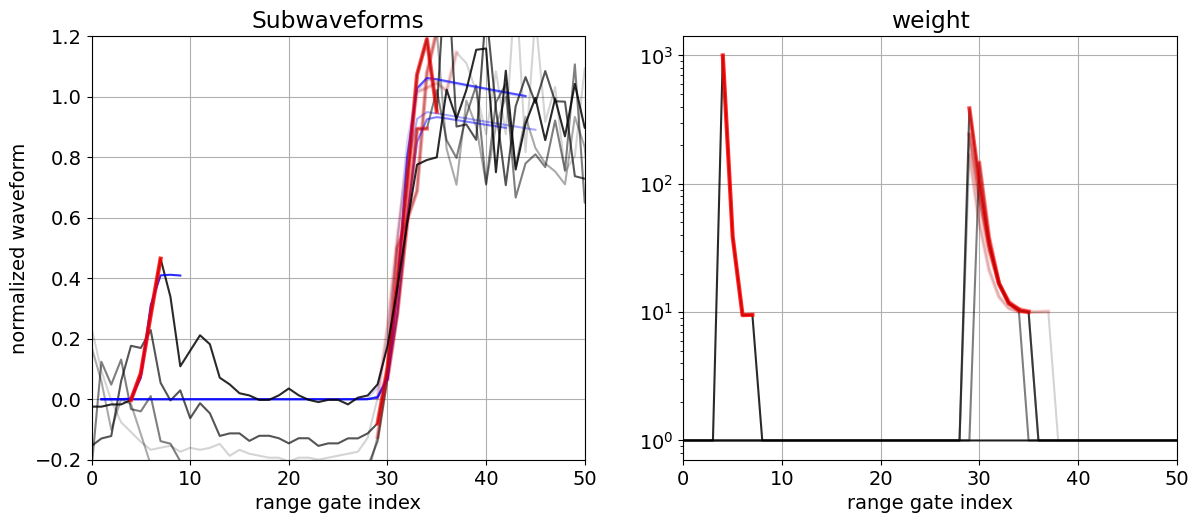

In [56]:
Hs0=S0['swh.07'][:].values
lat0=S0['glat.00'][:].values

lati=S2.lat_20hz[:,:].values.flatten()
Hsi=np.interp(lati,lat0,Hs0)
[nt,nr]=np.shape(S2.swh_WHALES_20hz)
Hsi2=Hsi.reshape((nt, nr))

lat1=-66.15 #26.65
lon1=222.75
latr=[lat1,-66]
lonr=[lon1,230]
#latr=[20,40]
inds=np.where(S1.lon_20hz[:,0] >lon1)[0][0:40]
lonss=Sg.lon_20hz[inds,:].values.flatten()


fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(lonss,Sg.sig0_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')

fig,axs = plt.subplots(1,1,figsize=(10,5))
[n1,n2,n3]=Sg.waveforms_20hz_ku[inds,:].shape
waveforms=Sg.waveforms_20hz_ku[inds,:].values.reshape((n1*n2,n3))
ax = axs
im=ax.pcolormesh(waveforms.T)



fig,axs = plt.subplots(1,1,figsize=(10,5))
ax = axs
im=ax.plot(lonss,Sg.swh_20hz_ku[inds,:].values.flatten(),c='g',label='GDR')
im=ax.plot(lonss,Hsi2[inds,:].flatten(),c='k',label='WHALES-'+tag1)
im=ax.plot(lonss,S1.swh_WHALES_20hz[inds,:].values.flatten(),c='r',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(lonss,S2.swh_WHALES_20hz[inds,:].values.flatten(),c='b',alpha=0.5,label='WHALES-'+tag2)
im=ax.scatter(S2.lon_20hz[inds,10],np.median(S2.swh_WHALES_20hz[inds,:],axis=1),c='r',s=50,label='1 Hz, WHALES-'+tag2)

fig,axs = plt.subplots(1,3,figsize=(18,5))
ax = axs[0]
im=ax.plot(Sg.lon_20hz[:,0],np.median(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
#im=ax.plot(S2.lon_20hz[:,0],np.median(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lon_20hz[:,0],np.median(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(S2.lon_20hz[:,0],np.median(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-'+tag2)

inds=np.where(np.abs(S1.lat_20hz[:,0]-40) < 10)[0]
print(f"median std: {np.nanmedian(np.nanstd(Sg.swh_20hz_ku[inds,:],axis=1)):.4f}" )
print(f"median std: {np.nanmedian(np.nanstd(Hsi2[inds,:],axis=1)):.4f}, {np.nanmedian(np.nanstd(S1.swh_WHALES_20hz[inds,:],axis=1)):.4f},{np.nanmedian(np.nanstd(S2.swh_WHALES_20hz[inds,:],axis=1)):.4f}" )


#im=ax.plot(S1.startgate_WHALES)
ax.set_ylim((0,21))
ax.set_title('median of SWH over 1 s')
ax.set_ylabel('SWH (m)')
ax.set_xlabel('longitude')
ax.set_xlim(lonr)

#ax.set_ylim((0,6))
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
ax.legend(loc='lower right', fontsize=16)
ax = axs[1]
im=ax.plot(Sg.lon_20hz[:,0],np.nanstd(Sg.swh_20hz_ku[:,:],axis=1),c='g',label='GDR')
#im=ax.plot(S2.lon_20hz[:,0],np.nanstd(Hsi2[:,:],axis=1),c='k',label='CCI-v3')
im=ax.plot(S1.lon_20hz[:,0],np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),c='r',alpha=0.5,label='WHALES-'+tag1)
im=ax.plot(S2.lon_20hz[:,0],np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1),c='b',alpha=0.5,label='WHALES-'+tag2)
ax.set_ylim((0,2))
ax.set_title('std of SWH over 1 s')
ax.set_ylabel('std(SWH) (m)')
ax.set_xlabel('longitude')
ax.set_xlim(lonr)
inds=np.where(S1.lon_20hz[:,0] >lon1)[0]
ind=inds[0]
ax = axs[2]
n1=15
nt=5
for k in range(nt): 
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/nt)
axs[2].set_title('Selection of full waveforms')
axs[2].set_xlabel('range gate index')
axs[2].set_ylabel('normalized waveform')
fig.savefig('J2_Kirin_waveforms_TEST'+tag+'_iceberg.pdf')



#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))

fig,axs = plt.subplots(1,2,figsize=(14,5.5))
ax = axs[0]
#im=ax.scatter(S1.lat_20hz[:,0],S1.swh_WHALES_20hz[:,0])
#im=ax.scatter(S1.lat_20hz[0:-1:20,0],S1.swh_WHALES_20hz[0:-1:20,:])

x=np.arange(0,104,1)
print('S1:',np.shape(S2.normalized_waveform),'##',S1.swh_WHALES_20hz[ind,:].values)
print('S2:',np.shape(S2.normalized_waveform),'##',S2.swh_WHALES_20hz[ind,:].values)


for k in range(nt):
    i1=int(S2.startgate_WHALES[ind,k+n1])
    i2=int(S2.endgate_WHALES[ind,k+n1])
    #im=ax.plot(S2.normalized_waveform[ind,k,:])
    ax = axs[0]
    print('ind:',ind,k+n1,S1.lat_20hz[ind,k+n1].values,np.max(S2.normalized_waveform[ind,k+n1,0:20]).values)
    im=ax.plot(x,S2.normalized_waveform[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.plot(x,S2.fitted_waveform[ind,k+n1,:],c='b',alpha=(k+1)/(nt+1))
    im=ax.plot(x[i1:i2],S2.normalized_waveform[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
    ax = axs[1]
    im=ax.semilogy(x,S2.weights[ind,k+n1,:],c='k',alpha=(k+1)/(nt+1))
    im=ax.semilogy(x[i1:i2],S2.weights[ind,k+n1,i1:i2],c='r',alpha=(k+1)/(nt+1),linewidth=3)
axs[0].set_title('Subwaveforms')
axs[0].set_xlabel('range gate index')
axs[0].set_ylabel('normalized waveform')
axs[1].set_title('weight')
axs[1].set_xlabel('range gate index')
#axs[1].set_ylabel('weight')

axs[1].set_xlim(0,50)
axs[0].set_ylim(-0.2,1.2)
axs[0].set_xlim(0,50)
#im=ax.plot(S2.weights[ind,0,i1:i2],c='k')
#im=ax.plot(S2.weights[ind,0,i1:i2],c='g')
#im=ax.scatter(np.nanstd(S1.swh_WHALES_20hz[:,:],axis=1),np.nanstd(S2.swh_WHALES_20hz[:,:],axis=1))
#ax.set_xlim((0,1))
#ax.set_ylim((0,12))
#ax.set_xlim((0,130))
#ax.set_ylim((0,100))
fig.savefig('J2_Kirin_subwaveforms_TEST'+tag+'_iceberg.pdf')

